In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Matchdata Reading from CSV File

In [2]:
matchdata=pd.read_csv('https://raw.githubusercontent.com/prakharmohan4/BYOP/main/IPL%20Ball-by-Ball%202008-2020.csv')

In [3]:
matchdata.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


## Aggregating Batsmen Data

In [4]:
        batsmen_score = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum()).\
            rename(columns={"batsman_runs": "total_runs"})
        batsmen_scores_30 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=30).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_30"})
        batsmen_scores_50 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=50).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_50"})
        batsmen_scores_100 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=100).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_100"})
        batsmen_scores_0 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())==0).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_0"})
        batsmen_ball_faced = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['over'].count()).\
            rename(columns={"over": "total_balls_faced"})
        batsmen_ball_faced_legal = pd.DataFrame(matchdata[matchdata['ball'] <=6].groupby(['id', 'batsman'])['ball'].count()).\
            rename(columns={"ball": "total_legal_balls_faced"})
        batsmen_scores6 = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 6].groupby(['id', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_6"})
        batsmen_scores4 = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 4].groupby(['id', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_4"})
        batsmen_position = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['is_wicket'].min())
       
        
        df_list = [batsmen_score, batsmen_ball_faced, batsmen_ball_faced_legal, batsmen_scores6, batsmen_scores4, batsmen_position,batsmen_scores_30,batsmen_scores_50,batsmen_scores_100,batsmen_scores_0]
        batsmen_summary = pd.concat(df_list, join='outer', axis=1).fillna(np.nan).reset_index()
        batsmen_summary = pd.merge(batsmen_summary, matchdata[['id', 'batsman', 'inning', 'batting_team', 'bowling_team']].
                                   drop_duplicates(), on=['id', 'batsman'], how='left')
        batsmen_summary.rename(columns={'inning': 'batsmen_innings', 'batsman': 'playername', 'batting_team': 'PlayingTeam',
                                        'bowling_team': 'Opponent Team'}, inplace=True)

In [5]:
batsmen_summary

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,total_runs_100,total_runs_0,batsmen_innings,PlayingTeam,Opponent Team
0,335982,AA Noffke,9,12,11.0,NaN,1.0,0,0,0,0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,B Akhil,0,2,2.0,NaN,NaN,0,0,0,0,1,2,Royal Challengers Bangalore,Kolkata Knight Riders
2,335982,BB McCullum,158,77,73.0,13.0,10.0,0,1,1,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,CL White,6,10,8.0,NaN,NaN,0,0,0,0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders
4,335982,DJ Hussey,12,12,12.0,NaN,1.0,0,0,0,0,0,1,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,1237181,RR Pant,56,40,38.0,2.0,4.0,0,1,1,0,0,1,Delhi Capitals,Mumbai Indians
12158,1237181,S Dhawan,15,13,13.0,NaN,3.0,0,0,0,0,0,1,Delhi Capitals,Mumbai Indians
12159,1237181,SA Yadav,19,20,20.0,1.0,1.0,0,0,0,0,0,2,Mumbai Indians,Delhi Capitals
12160,1237181,SO Hetmyer,5,5,5.0,NaN,1.0,0,0,0,0,0,1,Delhi Capitals,Mumbai Indians


## Aggregating Bowler Data

In [6]:
        bowler_wickets = pd.DataFrame(matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count()).\
            rename(columns={"is_wicket": "total_wickets"})
        bowler_overs_bow = pd.DataFrame(matchdata.groupby(['id', 'bowler'])['over'].count()).\
            rename(columns={"over": "total_balls_bowled"})
        bowler_ball_faced_legal = pd.DataFrame(matchdata[matchdata['ball'] <=6].groupby(['id', 'bowler'])['ball'].count()).\
            rename(columns={"ball": "total_legal_balls_bowled"})
        # calculating the number of maiden overs bowled in a match
        bowler_runs_given = pd.DataFrame(matchdata.groupby(['id', 'bowler'])['batsman_runs'].sum()).\
            rename(columns={"batsman_runs": "total_runs_given"})
        bowler_wickets_3 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==3).astype(int).\
            rename(columns={"is_wicket": "total_wickets_3"})
        bowler_wickets_4 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==4).astype(int).\
            rename(columns={"is_wicket": "total_wickets_4"})
        bowler_wickets_5 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==5).astype(int).\
            rename(columns={"is_wicket": "total_wickets_5"})
        bowler_maiden = pd.DataFrame(matchdata.groupby(['id', 'bowler', 'over'])['total_runs'].sum()).reset_index()
        bowler_maiden['maiden_overs'] = np.where(bowler_maiden['total_runs'] == 0, 1, 0)
        bowler_maiden = bowler_maiden.groupby(['id', 'bowler'])['maiden_overs'].sum()
        
        #legbyes to be considered
        
        df_list = [bowler_wickets, bowler_overs_bow, bowler_ball_faced_legal, bowler_runs_given,bowler_wickets_3,bowler_wickets_4,bowler_wickets_5,bowler_maiden]
        bowler_summary = pd.concat(df_list, join='outer', axis=1).fillna(np.nan).reset_index()
        # adding additional columns just in case we need for modeling
        bowler_summary = pd.merge(bowler_summary, matchdata[['id', 'bowler', 'inning', 'batting_team', 'bowling_team']].drop_duplicates(), on=['id', 'bowler'], how='left')
        bowler_summary.rename(columns={'inning': 'bowlers_innings', 'bowler': 'playername', 'batting_team': 'Playing team',
                                       'bowling_team': 'Opponent Team'}, inplace=True)
        bowler_summary['economy_rate'] = (bowler_summary['total_runs_given'] * 6) / bowler_summary['total_legal_balls_bowled']
        bowler_summary['eco less than 5'] = (bowler_summary['economy_rate']<=5).astype(int)
        bowler_summary['eco 5-5.99'] = ((bowler_summary['economy_rate']<6)&(bowler_summary['economy_rate']>=5)).astype(int)
        bowler_summary['eco 6-7'] = ((bowler_summary['economy_rate']>=6)&(bowler_summary['economy_rate']<7)).astype(int)
        bowler_summary['eco 7-10'] = ((bowler_summary['economy_rate']>=7)&(bowler_summary['economy_rate']<10)).astype(int)
        bowler_summary['eco 11-12'] = ((bowler_summary['economy_rate']>=11)&(bowler_summary['economy_rate']<12)).astype(int)
        bowler_summary['eco greater than 12'] = (bowler_summary['economy_rate']>12).astype(int)

In [7]:
bowler_summary

,id,playername,total_wickets,total_balls_bowled,total_legal_balls_bowled,total_runs_given,total_wickets_3,total_wickets_4,total_wickets_5,maiden_overs,bowlers_innings,Playing team,Opponent Team,economy_rate,eco less than 5,eco 5-5.99,eco 6-7,eco 7-10,eco 11-12,eco greater than 12
0,335982,AA Noffke,1.0,25,24,35,0.0,0.0,0.0,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,8.750000,0,0,0,1,0,0
1,335982,AB Agarkar,3.0,28,24,21,1.0,0.0,0.0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,5.250000,0,1,0,0,0,0
2,335982,AB Dinda,2.0,20,18,7,0.0,0.0,0.0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,2.333333,1,0,0,0,0,0
3,335982,CL White,NaN,7,6,22,NaN,NaN,NaN,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,22.000000,0,0,0,0,0,1
4,335982,I Sharma,1.0,19,18,6,0.0,0.0,0.0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,2.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,1237181,MP Stoinis,1.0,12,12,23,0.0,0.0,0.0,0,2,Mumbai Indians,Delhi Capitals,11.500000,0,0,0,0,1,0
9663,1237181,NM Coulter-Nile,2.0,25,24,28,0.0,0.0,0.0,0,1,Delhi Capitals,Mumbai Indians,7.000000,0,0,0,1,0,0
9664,1237181,P Dubey,NaN,18,18,29,NaN,NaN,NaN,0,2,Mumbai Indians,Delhi Capitals,9.666667,0,0,0,1,0,0
9665,1237181,R Ashwin,NaN,24,24,28,NaN,NaN,NaN,0,2,Mumbai Indians,Delhi Capitals,7.000000,0,0,0,1,0,0


## Merging Bowler and Batsmen Stats

In [8]:
ipl_merged_scorecard = pd.merge(batsmen_summary, bowler_summary, on=['id', 'playername'], how='outer')

In [9]:
ipl_merged_scorecard

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,bowlers_innings,Playing team,Opponent Team_y,economy_rate,eco less than 5,eco 5-5.99,eco 6-7,eco 7-10,eco 11-12,eco greater than 12
0,335982,AA Noffke,9.0,12.0,11.0,NaN,1.0,0.0,0.0,0.0,...,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,8.750000,0.0,0.0,0.0,1.0,0.0,0.0
1,335982,B Akhil,0.0,2.0,2.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,BB McCullum,158.0,77.0,73.0,13.0,10.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,CL White,6.0,10.0,8.0,NaN,NaN,0.0,0.0,0.0,...,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,22.000000,0.0,0.0,0.0,0.0,0.0,1.0
4,335982,DJ Hussey,12.0,12.0,12.0,NaN,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1237181,K Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,10.666667,0.0,0.0,0.0,0.0,0.0,0.0
17147,1237181,NM Coulter-Nile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Delhi Capitals,Mumbai Indians,7.000000,0.0,0.0,0.0,1.0,0.0,0.0
17148,1237181,P Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,9.666667,0.0,0.0,0.0,1.0,0.0,0.0
17149,1237181,R Ashwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,7.000000,0.0,0.0,0.0,1.0,0.0,0.0


## Calculating Player Role

In [10]:
#All Rounder - If the Player has faced atleast 8 balls and bowled atleast 6 balls then he's an All rounder
#Bowler - If the Player has bowled more than 6 balls then he's a bowler 
# Batsem- If the Player has faced more than 8 balls then he's a batsmen (deafault) 

MINAVGBALLSFACED = 8
MINAVGBOWLSBOWLED = 6
player_avg = ipl_merged_scorecard[['playername', 'total_balls_faced', 'total_balls_bowled']].fillna(0)
player_avg = pd.DataFrame(player_avg.groupby('playername')[['total_balls_faced', 'total_balls_bowled']].mean())
conditions = [((player_avg['total_balls_faced'] >= MINAVGBALLSFACED) & (player_avg['total_balls_bowled'] >= MINAVGBOWLSBOWLED)),
              (player_avg['total_balls_bowled'] >= MINAVGBOWLSBOWLED)]
choices = ['AllRounder', 'Bowler']
player_avg['playing_role'] = np.select(conditions, choices, default='Batsmen')
player_avg = player_avg.reset_index()

In [11]:
player_avg

,playername,total_balls_faced,total_balls_bowled,playing_role
0,A Ashish Reddy,7.000000,9.642857,Bowler
1,A Chandila,0.583333,19.500000,Bowler
2,A Chopra,12.500000,0.000000,Batsmen
3,A Choudhary,4.000000,21.600000,Bowler
4,A Dananjaya,5.000000,25.000000,Bowler
...,...,...,...,...
575,YV Takawale,18.300000,0.000000,Batsmen
576,Yashpal Singh,16.750000,0.000000,Batsmen
577,Younis Khan,7.000000,0.000000,Batsmen
578,Yuvraj Singh,17.093023,6.837209,AllRounder


In [12]:
ipl_merged_scorecard = ipl_merged_scorecard.merge(player_avg[["playername","playing_role"]], how="inner",on="playername")


In [13]:
ipl_merged_scorecard

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,Playing team,Opponent Team_y,economy_rate,eco less than 5,eco 5-5.99,eco 6-7,eco 7-10,eco 11-12,eco greater than 12,playing_role
0,335982,AA Noffke,9.0,12.0,11.0,NaN,1.0,0.0,0.0,0.0,...,Kolkata Knight Riders,Royal Challengers Bangalore,8.750000,0.0,0.0,0.0,1.0,0.0,0.0,AllRounder
1,335982,B Akhil,0.0,2.0,2.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bowler
2,335985,B Akhil,3.0,6.0,6.0,NaN,NaN,0.0,0.0,0.0,...,Mumbai Indians,Royal Challengers Bangalore,5.666667,0.0,1.0,0.0,0.0,0.0,0.0,Bowler
3,335996,B Akhil,2.0,3.0,3.0,NaN,NaN,0.0,0.0,0.0,...,Chennai Super Kings,Royal Challengers Bangalore,8.500000,0.0,0.0,0.0,1.0,0.0,0.0,Bowler
4,336002,B Akhil,27.0,7.0,7.0,3.0,2.0,0.0,0.0,0.0,...,Deccan Chargers,Royal Challengers Bangalore,13.000000,0.0,0.0,0.0,0.0,0.0,1.0,Bowler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1216521,JR Hazlewood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Mumbai Indians,Chennai Super Kings,8.500000,0.0,0.0,0.0,1.0,0.0,0.0,Bowler
17147,1216533,JR Hazlewood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rajasthan Royals,Chennai Super Kings,4.750000,1.0,0.0,0.0,0.0,0.0,0.0,Bowler
17148,1216539,JR Hazlewood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Delhi Capitals,Chennai Super Kings,6.750000,0.0,0.0,1.0,0.0,0.0,0.0,Bowler
17149,1216526,CJ Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Mumbai Indians,Kolkata Knight Riders,8.470588,0.0,0.0,0.0,1.0,0.0,0.0,Bowler


## Points Calculation

In [14]:
pointsconfig = {
        'total_runs': 1,
        'run_6': 2,
        'run_4': 1,
        '>=30':4,
        '>=50': 8,
        '>=100': 16,
        'duck': -2,
        'total_wickets': 25,
        '<=3W':4,
        '>=4W': 8,
        '>=5W': 16,
        'maiden_overs': 8,
        '<=5E': 6,
        '<6E': 4,
        '<7E': 2,
        '>10E': -2,
        '>11E': -4,
        '>12E': -6
    }

### Batsmen Points

In [15]:
        ipl_merged_scorecard['total_runs_points'] = ipl_merged_scorecard['total_runs'] * pointsconfig['total_runs']
        ipl_merged_scorecard['run_6_points'] = pointsconfig['run_6'] *  ipl_merged_scorecard['run_6']
        ipl_merged_scorecard['run_4_points'] = pointsconfig['run_4'] *  ipl_merged_scorecard['run_4']
        ipl_merged_scorecard['30_Run_Points'] = pointsconfig['>=30'] *  ipl_merged_scorecard['total_runs_30']
        ipl_merged_scorecard['50_Run_Points'] = pointsconfig['>=50'] *  ipl_merged_scorecard['total_runs_50']
        ipl_merged_scorecard['100_Run_Points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_runs_100']
        ipl_merged_scorecard['duck_Points'] = pointsconfig['duck'] *  ipl_merged_scorecard['total_runs_0']
        ipl_merged_scorecard['total_bat_points'] = np.nan
        ipl_merged_scorecard['total_bat_points'] = ipl_merged_scorecard['total_runs_points'].add(ipl_merged_scorecard['run_6_points'], fill_value=0). \
            add(ipl_merged_scorecard['run_4_points'], fill_value=0).add(ipl_merged_scorecard['30_Run_Points'], fill_value=0).\
            add(ipl_merged_scorecard['50_Run_Points'], fill_value=0).add(ipl_merged_scorecard['100_Run_Points'], fill_value=0).\
            add(ipl_merged_scorecard['duck_Points'], fill_value=0)
        ipl_merged_scorecard['total_bat_points'] = np.where(ipl_merged_scorecard['total_balls_faced'] >= 1, ipl_merged_scorecard['total_bat_points'], np.nan)

### Bowler Points

In [16]:
        ipl_merged_scorecard['total_wicket_points'] = ipl_merged_scorecard['total_wickets'] * pointsconfig['total_wickets']
        ipl_merged_scorecard['<=5E_points'] = pointsconfig['<=5E'] *  ipl_merged_scorecard['eco less than 5']
        ipl_merged_scorecard['<6E_points'] = pointsconfig['<6E'] *  ipl_merged_scorecard['eco 5-5.99']
        ipl_merged_scorecard['<7E_points'] = pointsconfig['<7E'] *  ipl_merged_scorecard['eco 6-7']
        ipl_merged_scorecard['>10E_points'] = pointsconfig['>10E'] *  ipl_merged_scorecard['eco 7-10']
        ipl_merged_scorecard['>11E_points'] = pointsconfig['>11E'] *  ipl_merged_scorecard['eco 11-12']
        ipl_merged_scorecard['>12E_points'] = pointsconfig['>12E'] *  ipl_merged_scorecard['eco greater than 12']
        ipl_merged_scorecard['3W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_3']
        ipl_merged_scorecard['4W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_4']
        ipl_merged_scorecard['5W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_5']
        ipl_merged_scorecard['maiden_overs_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['maiden_overs']
        ipl_merged_scorecard['total_bowl_points'] = np.nan
        ipl_merged_scorecard['total_bowl_points'] = ipl_merged_scorecard['total_wicket_points'].add(ipl_merged_scorecard['<=5E_points'], fill_value=0). \
            add(ipl_merged_scorecard['<6E_points'], fill_value=0).add(ipl_merged_scorecard['<7E_points'], fill_value=0).\
            add(ipl_merged_scorecard['>10E_points'], fill_value=0).add(ipl_merged_scorecard['>11E_points'], fill_value=0).\
            add(ipl_merged_scorecard['>12E_points'], fill_value=0).add(ipl_merged_scorecard['3W_points'], fill_value=0).\
            add(ipl_merged_scorecard['4W_points'], fill_value=0).add(ipl_merged_scorecard['5W_points'], fill_value=0).\
            add(ipl_merged_scorecard['maiden_overs_points'], fill_value=0)
        ipl_merged_scorecard['total_bowl_points'] = np.where(ipl_merged_scorecard['total_balls_bowled'] >= 1, ipl_merged_scorecard['total_bowl_points'], np.nan)

In [17]:
ipl_merged_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17151 entries, 0 to 17150
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17151 non-null  int64  
 1   playername                17151 non-null  object 
 2   total_runs                12162 non-null  float64
 3   total_balls_faced         12162 non-null  float64
 4   total_legal_balls_faced   12111 non-null  float64
 5   run_6                     4530 non-null   float64
 6   run_4                     7451 non-null   float64
 7   is_wicket                 12162 non-null  float64
 8   total_runs_30             12162 non-null  float64
 9   total_runs_50             12162 non-null  float64
 10  total_runs_100            12162 non-null  float64
 11  total_runs_0              12162 non-null  float64
 12  batsmen_innings           12162 non-null  float64
 13  PlayingTeam               12162 non-null  object 
 14  Oppone

### Merging Bowler and Batsmen Points

In [18]:
ipl_merged_scorecard['total_points'] = ipl_merged_scorecard['total_bat_points'].add(ipl_merged_scorecard['total_bowl_points'], fill_value=0)

### Dropping Irrelevant Columns

In [19]:
ipl_merged_scorecard.drop(['id','PlayingTeam','Opponent Team_x','Playing team','Opponent Team_y'],axis=1,inplace=True)

In [20]:
ipl_merged_scorecard.columns

Index(['playername', 'total_runs', 'total_balls_faced',
       'total_legal_balls_faced', 'run_6', 'run_4', 'is_wicket',
       'total_runs_30', 'total_runs_50', 'total_runs_100', 'total_runs_0',
       'batsmen_innings', 'total_wickets', 'total_balls_bowled',
       'total_legal_balls_bowled', 'total_runs_given', 'total_wickets_3',
       'total_wickets_4', 'total_wickets_5', 'maiden_overs', 'bowlers_innings',
       'economy_rate', 'eco less than 5', 'eco 5-5.99', 'eco 6-7', 'eco 7-10',
       'eco 11-12', 'eco greater than 12', 'playing_role', 'total_runs_points',
       'run_6_points', 'run_4_points', '30_Run_Points', '50_Run_Points',
       '100_Run_Points', 'duck_Points', 'total_bat_points',
       'total_wicket_points', '<=5E_points', '<6E_points', '<7E_points',
       '>10E_points', '>11E_points', '>12E_points', '3W_points', '4W_points',
       '5W_points', 'maiden_overs_points', 'total_bowl_points',
       'total_points'],
      dtype='object')

In [21]:
#ipl_merged_scorecard.replace([np.inf, -np.inf], np.nan, inplace=True)
ipl_merged_scorecard.fillna(0,inplace=True)

### One hot Encoding for playing_role

In [22]:
one_hot = pd.get_dummies(ipl_merged_scorecard['playing_role'],drop_first=True)
 #Drop column as it is now encoded
ipl_merged_scorecard = ipl_merged_scorecard.drop('playing_role',axis = 1)
#Join the encoded df


In [23]:
ipl_merged_scorecard = ipl_merged_scorecard.join(one_hot)
ipl_merged_scorecard

,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,total_runs_100,...,>11E_points,>12E_points,3W_points,4W_points,5W_points,maiden_overs_points,total_bowl_points,total_points,Batsmen,Bowler
0,AA Noffke,9.0,12.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,23.0,33.0,0,0
1,B Akhil,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0,1
2,B Akhil,3.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,54.0,57.0,0,1
3,B Akhil,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0,1
4,B Akhil,27.0,7.0,7.0,3.0,2.0,0.0,0.0,0.0,0.0,...,-0.0,-6.0,0.0,0.0,0.0,0.0,-6.0,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,JR Hazlewood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0,1
17147,JR Hazlewood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,31.0,31.0,0,1
17148,JR Hazlewood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,1
17149,CJ Green,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0,1


### Rearranging Columns

In [24]:
ipl_merged_scorecard= ipl_merged_scorecard[['playername','total_runs', 'total_balls_faced', 'total_legal_balls_faced', 'run_6',
       'run_4', 'is_wicket', 'total_runs_30', 'total_runs_50',
       'total_runs_100', 'total_runs_0', 'batsmen_innings', 'total_wickets',
       'total_balls_bowled', 'total_legal_balls_bowled', 'total_runs_given',
       'total_wickets_3', 'total_wickets_4', 'total_wickets_5', 'maiden_overs',
       'bowlers_innings', 'economy_rate', 'eco less than 5', 'eco 5-5.99',
       'eco 6-7', 'eco 7-10', 'eco 11-12', 'eco greater than 12',
       'Bowler', 'Batsmen','total_points']]

In [25]:
df1=ipl_merged_scorecard.copy()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
ipl_merged_scorecard.playername.value_counts().sort_values(ascending=False)

RG Sharma            194
SK Raina             189
V Kohli              185
MS Dhoni             182
RV Uthappa           182
                    ... 
PSP Handscomb          1
Rasikh Salam           1
CJ Dala                1
Tejas Baroka           1
Harmeet Singh (2)      1
Name: playername, Length: 580, dtype: int64

### Removing players who have played less than 5 matches

In [29]:
df = ipl_merged_scorecard.groupby('playername').filter(lambda x : len(x)>5)
df.head(20)

,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,total_runs_100,...,economy_rate,eco less than 5,eco 5-5.99,eco 6-7,eco 7-10,eco 11-12,eco greater than 12,Bowler,Batsmen,total_points
1,B Akhil,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,-2.0
2,B Akhil,3.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.666667,0.0,1.0,0.0,0.0,0.0,0.0,1,0,57.0
3,B Akhil,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.500000,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.0
4,B Akhil,27.0,7.0,7.0,3.0,2.0,0.0,0.0,0.0,0.0,...,13.000000,0.0,0.0,0.0,0.0,0.0,1.0,1,0,29.0
5,B Akhil,5.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.666667,0.0,1.0,0.0,0.0,0.0,0.0,1,0,10.0
6,B Akhil,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.300000,0.0,0.0,1.0,0.0,0.0,0.0,1,0,5.0
7,B Akhil,6.0,7.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.000000,1.0,0.0,0.0,0.0,0.0,0.0,1,0,13.0
8,B Akhil,9.0,9.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,10.0
9,B Akhil,8.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.000000,0.0,0.0,0.0,1.0,0.0,0.0,1,0,33.0
10,B Akhil,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,1,0,4.0


## POP FUNCTION LR MODEL

In [30]:
# New Code
models={}
errors={}
models_pred={}
for i in df['playername']:
    X = df[df['playername']==i].drop(columns=['total_points','playername'])
    y=df[df['playername']==i]['total_points']
    X_train, X_test, y_train, y_test=train_test_split(X,y, random_state = 42,  test_size=0.25)
    lr = LinearRegression().fit(X_train,y_train)
    models[i]=lr
    y_pred = lr.predict(X_test)
    models_pred[i]={"y true":y_test.squeeze(), "y_pred":y_pred.squeeze()} 
    #errors[i] = { "R2 Score" : round(r2_score(y_test , y_pred), 2),
                #"RMSE" : round(np.sqrt(mean_squared_error(y_test , y_pred)),2), 
                 #"MSE": round(mean_squared_error(y_test , y_pred),2), 
                 #"MAE": round(mean_absolute_error(y_test , y_pred),2)} 

### Model Evaluation

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print( "R2 Score: ", r2_score(y_test , y_pred) )
print( "MSE: ", mean_squared_error(y_test , y_pred) )
print( "RMSE: ", np.sqrt(mean_squared_error(y_test , y_pred)) )
print( "MAE: ", mean_absolute_error(y_test , y_pred) )

R2 Score:  0.8113957900293948
MSE:  143.00390320437893
RMSE:  11.95842394316153
MAE:  9.81769482695384


C:\Users\Yogesh Arora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


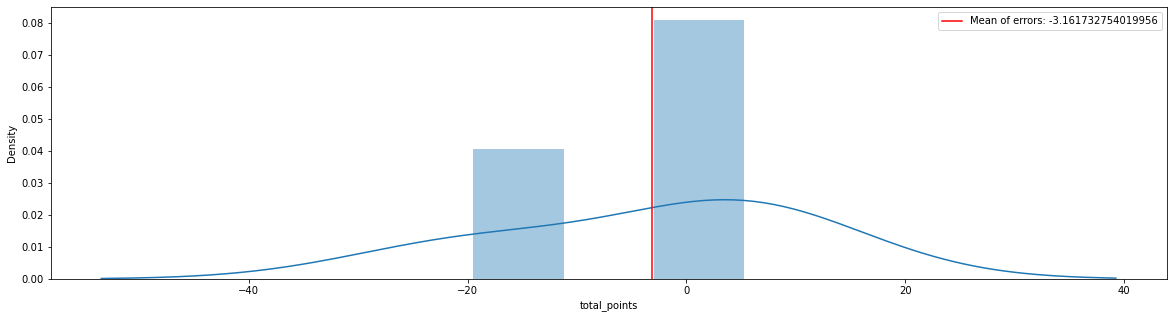

In [94]:
errors = y_test - y_pred

plt.figure(figsize=(20,5))
sns.distplot(errors, bins = "sturges")
plt.axvline(x = errors.mean() , color ="r", label = f"Mean of errors: {errors.mean()}")
plt.legend()
plt.show()

In [95]:
len(errors)

3

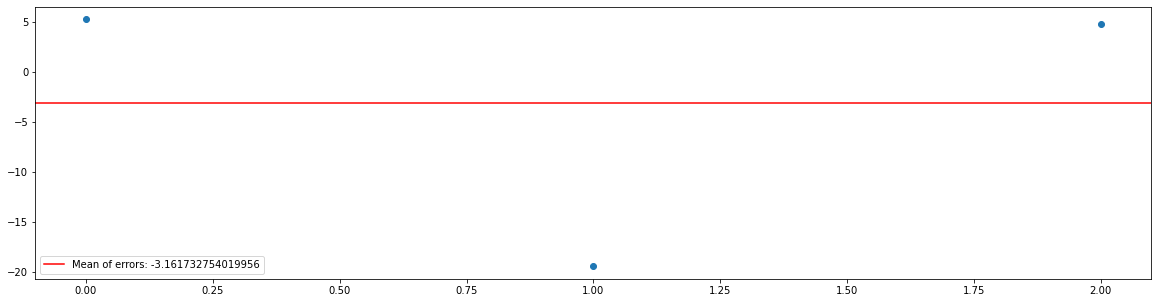

In [97]:
plt.figure(figsize=(20,5))
plt.scatter(range(len(X_test)), errors)
plt.axhline(y = errors.mean() , color ="r", label = f"Mean of errors: {errors.mean()}")
plt.legend()
plt.show()

In [99]:
import statsmodels.api as sm


x_train_2 = sm.add_constant(X_train)
ols = sm.OLS(y_train, x_train_2).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 01 Jul 2022   Prob (F-statistic):                nan
Time:                        00:57:36   Log-Likelihood:                 222.67
No. Observations:                   8   AIC:                            -429.3
Df Residuals:                       0   BIC:                            -428.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
total_runs              

C:\Users\Yogesh Arora\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Yogesh Arora\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Yogesh Arora\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Yogesh Arora\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Yogesh Arora\anaconda3\lib\site-packages\statsmodels\base\model.py:1452: RuntimeWarning: invalid value encountered in multip

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

                     feature  VIF
0                 total_runs  NaN
1          total_balls_faced  NaN
2    total_legal_balls_faced  NaN
3                      run_6  NaN
4                      run_4  NaN
5                  is_wicket  NaN
6              total_runs_30  NaN
7              total_runs_50  NaN
8             total_runs_100  NaN
9               total_runs_0  NaN
10           batsmen_innings  NaN
11             total_wickets  inf
12        total_balls_bowled  inf
13  total_legal_balls_bowled  inf
14          total_runs_given  inf
15           total_wickets_3  inf
16           total_wickets_4  inf
17           total_wickets_5  NaN
18              maiden_overs  inf
19           bowlers_innings  inf
20              economy_rate  inf
21           eco less than 5  inf
22                eco 5-5.99  inf
23                   eco 6-7  inf
24                  eco 7-10  inf
25                 eco 11-12  inf
26       eco greater than 12  inf
27                    Bowler  0.0
28            

C:\Users\Yogesh Arora\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Yogesh Arora\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Yogesh Arora\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


### Preparing Data for LPP

In [35]:
new= pd.DataFrame.from_dict(models_pred, orient='index')

In [36]:
new['playername'] = new.index

In [38]:
new.drop('y true', axis=1,inplace=True)

In [72]:
new

,playername,y_pred,playing_role
0,B Akhil,"[9.957069121285912, 5.30818081747644, 2.601862...",Bowler
1,BB McCullum,"[8.000000000000322, 19.999999999999922, 1.0000...",Batsmen
2,CL White,"[72.25309389103118, 97.99999999999994, 101.999...",Batsmen
3,DJ Hussey,"[12.999999999999964, 118.00000000000011, 8.999...",Batsmen
4,JH Kallis,"[23.000000000000032, 6.999999999999946, 34.999...",AllRounder
...,...,...,...
408,P Amarnath,"[29.6175793008454, 9.126275250035516]",Bowler
409,AM Salvi,"[26.90465315788821, 0.810756274090382]",Bowler
410,Anand Rajan,"[22.8053566227645, 26.700672269367452]",Bowler
411,BW Hilfenhaus,"[22.999999999999975, 47.99999999999999, 34.999...",Bowler


In [40]:
new= new[['playername','y_pred']]

In [48]:
new=new.merge(player_avg,on='playername')

In [51]:
new.drop(['total_balls_faced','total_balls_bowled'],axis=1,inplace=True)

### Input Dataframe

In [74]:
inputdf=pd.read_csv(r'C:\Users\Yogesh Arora\newdf.csv')

In [75]:
inputdf=inputdf.merge(new,how='left')

In [76]:
inputdf

,playername,playing_team,y_pred,playing_role
0,AM Rahane,MI,"[47.00000000000001, 96.00000000000003, 15.0000...",Batsmen
1,AR Patel,DC,"[37.000000000000284, 43.999999999999794, 22.99...",Bowler
2,HH Pandya,MI,"[54.99999999999997, 20.000000000000025, 16.999...",AllRounder
3,Ishan Kishan,MI,"[34.000000000000014, 25.00000000000006, 5.0000...",Batsmen
4,KA Pollard,MI,"[20.999999999999922, 3.000000000000147, 24.999...",AllRounder
5,KH Pandya,MI,"[110.99999999999994, 58.00000000000003, 0.9999...",AllRounder
6,MP Stoinis,DC,"[128.99999999999994, 126.00000000000006, 54.00...",AllRounder
7,Q de Kock,MI,"[1.0000000000000262, 8.000000000000021, 2.0000...",Batsmen
8,RG Sharma,MI,"[2.000000000000169, 19.000000000000224, 20.000...",Batsmen
9,RR Pant,DC,"[6.9999999999999964, 6.999999999999989, 4.9999...",Batsmen


### Creating Dummy Variables

In [77]:
def get_dummies(data, col_names = ["playing_role", "playing_team"]):
    dummies_data = pd.get_dummies(inputdf, columns=["playing_role", "playing_team"])
    return dummies_data

In [78]:
finaldf = get_dummies(inputdf)

In [79]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   playername               21 non-null     object
 1   y_pred                   21 non-null     object
 2   playing_role_AllRounder  21 non-null     uint8 
 3   playing_role_Batsmen     21 non-null     uint8 
 4   playing_role_Bowler      21 non-null     uint8 
 5   playing_team_DC          21 non-null     uint8 
 6   playing_team_MI          21 non-null     uint8 
dtypes: object(2), uint8(5)
memory usage: 609.0+ bytes


### Computing Weighted Average

In [80]:
def compute_weighted_points(points_vector, alpha = 0.20):
    weights = np.exp(list(reversed(np.array(range(1, len(points_vector)+1))*alpha * -1)))
    exponential_weighted_average = np.average(np.array(points_vector), weights = weights)
    return exponential_weighted_average

In [90]:
finaldf['predicted_points'] = finaldf['y_pred'].apply(compute_weighted_points)
finaldf.reset_index(inplace = True)
display(finaldf[['playername', 'y_pred', 'predicted_points']].head())

,playername,y_pred,predicted_points
0,AM Rahane,"[47.00000000000001, 96.00000000000003, 15.0000...",29.423008
1,AR Patel,"[37.000000000000284, 43.999999999999794, 22.99...",30.599715
2,HH Pandya,"[54.99999999999997, 20.000000000000025, 16.999...",31.802127
3,Ishan Kishan,"[34.000000000000014, 25.00000000000006, 5.0000...",29.067513
4,KA Pollard,"[20.999999999999922, 3.000000000000147, 24.999...",20.682615


### Linear Programming Problem

In [82]:
max_players = 11
max_batsman = 5
max_allrounders = 3
max_bowlers = 5
max_team1_players = 7
max_team2_players = 7

In [83]:
import pulp

In [84]:
prob = pulp.LpProblem('Dreamteam', pulp.LpMaximize)

### Decision Variables

In [85]:
decision_variables = []

for rownum, row in finaldf.iterrows():
    variable = str('x_{}'.format(str(rownum)))
    variable = pulp.LpVariable(variable, lowBound = 0, upBound = 1, cat = 'Integer' ) 
    decision_variables.append(variable)
    
print(decision_variables)

[x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20]


In [86]:
print(finaldf.columns)
total_points = ''
for rownum, row in finaldf.iterrows():
    formula = row['weighted_player_points'] * decision_variables[rownum]
    total_points+= formula
prob += total_points

Index(['index', 'playername', 'y_pred', 'playing_role_AllRounder',
       'playing_role_Batsmen', 'playing_role_Bowler', 'playing_team_DC',
       'playing_team_MI', 'weighted_player_points'],
      dtype='object')


### Defining Constraints for Dream11 Team

In [87]:
total_batsman = ''
total_allrounder = ''
total_bowler = ''
total_players = ''
total_team2 = ''
total_team1 = ''

for rownum, row in finaldf.iterrows():
    batsman_formula = row['playing_role_Batsmen'] * decision_variables[rownum]
    total_batsman += batsman_formula
    
    allrounder_formula = row['playing_role_AllRounder'] * decision_variables[rownum]
    total_allrounder+=allrounder_formula
    
    bowler_formula = row['playing_role_Bowler']*decision_variables[rownum]
    total_bowler += bowler_formula
    
    total_players_formula = decision_variables[rownum]
    total_players += total_players_formula
    
    formula = row['playing_team_DC']*decision_variables[rownum]
    total_team1 += formula
    
    formula = row['playing_team_MI']*decision_variables[rownum]
    total_team2 += formula
    

prob += (total_batsman <= max_batsman)
prob += (total_allrounder <= max_allrounders)
prob += (total_bowler <= max_bowlers)
prob += (total_players == max_players)
prob += (total_team1 <= max_team1_players)
prob += (total_team2 <= max_team2_players)



print(prob)
prob.writeLP('Dreamteam.lp')

optimization_result = prob.solve()

Dreamteam:
MAXIMIZE
29.423008199025347*x_0 + 30.599715315967437*x_1 + 54.1843023850234*x_10 + 39.77364238441534*x_11 + 20.376645610212055*x_12 + 45.60445193110279*x_13 + 30.682568948747328*x_14 + 7.8585856831326755*x_15 + 41.954658484878195*x_16 + 63.62378973438117*x_17 + 24.4595126498497*x_18 + 20.191035384287897*x_19 + 31.80212721988735*x_2 + 27.571696955508628*x_20 + 29.067513280813298*x_3 + 20.68261536028649*x_4 + 35.490616608873324*x_5 + 43.29341015377369*x_6 + 41.45134416598165*x_7 + 23.03195254875973*x_8 + 23.647749438372852*x_9 + 0.0
SUBJECT TO
_C1: x_0 + x_10 + x_11 + x_12 + x_13 + x_3 + x_7 + x_8 + x_9 <= 5

_C2: x_2 + x_4 + x_5 + x_6 <= 3

_C3: x_1 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 <= 5

_C4: x_0 + x_1 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18
 + x_19 + x_2 + x_20 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 = 11

_C5: x_1 + x_10 + x_12 + x_13 + x_14 + x_17 + x_19 + x_6 + x_9 <= 7

_C6: x_0 + x_11 + x_15 + x_16 + x_18 + x_2 + x_20 + x_3 + x_4

### Calculating Maximum Points

In [88]:
import re

In [92]:
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)
    
df = pd.DataFrame({'index': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['index'])
    df.loc[rownum, 'index'] = int(value[0])

df = df.sort_values(by = 'index')
result = pd.merge(finaldf, df, on = 'index')
result = result[result['value'] == 1].sort_values(by = 'predicted_points', ascending = False)
selected_cols_final = ['playername', 'playing_team_DC', 'playing_team_MI', 'predicted_points']
final_set_of_players_to_be_selected = result[selected_cols_final]

display(final_set_of_players_to_be_selected)

,playername,playing_team_DC,playing_team_MI,predicted_points
17,K Rabada,1,0,63.623790
10,S Dhawan,1,0,54.184302
13,SS Iyer,1,0,45.604452
6,MP Stoinis,1,0,43.293410
16,JJ Bumrah,0,1,41.954658
7,Q de Kock,0,1,41.451344
11,SA Yadav,0,1,39.773642
5,KH Pandya,0,1,35.490617
2,HH Pandya,0,1,31.802127
14,A Nortje,1,0,30.682569
